# 1: TITANIC - Machine Learning prediction

- Task: Use machine learning to predict survival chance of passengers on the infamous Titanic.

- Models used:
    - Logistic regression
    - (Optional) Naive Bayes

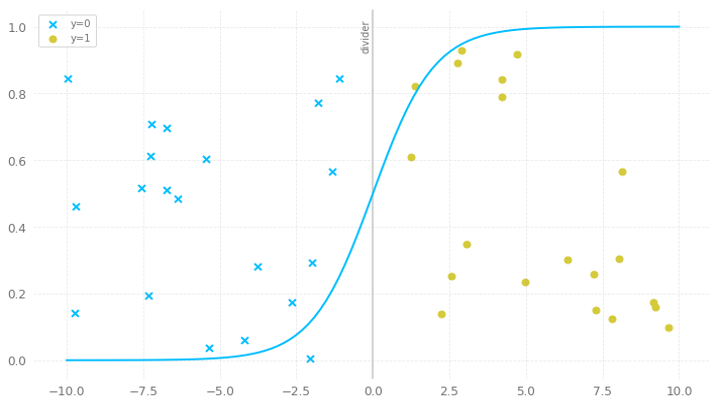

**DATA DICTIONARY**
- ***PassengerId*** -> ID of the passenger
- ***Survived*** -> **0 = No, 1 = Yes**
- ***Pclass*** -> Passenger class; **1 = first, 2 = second, 3 = third**
- ***Name*** -> Passenger name
- ***Sex*** -> female or male
- ***Age***
- ***SibSp*** -> count of siblings
- ***Parch*** -> count of parents
- ***Ticket*** -> Ticket number
- ***Fare*** -> Money spent on ticket
- ***Cabin*** -> Cabin number
- ***Embarked*** -> shipyard where passenger embarked; **C = Cherbourg, Q = Queenstown, S = Southampto**


# 2: Import knihoven a datasetu

In [ ]:
# Install libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
# Import libraries for use
import pandas as pd # for manipulation with tabular data
import numpy as np # for access to vectors, matrices and multidimensional fields
import matplotlib.pyplot as plt # for visualization and charts
import seaborn as sns # charting addon for matplotlib

In [ ]:
# Check files
!ls

In [ ]:
# Read in csv data
titanic_df = pd.read_csv('titanic.csv')


In [ ]:
# Show dataframe
titanic_df

In [ ]:
# Show first 7 rows
titanic_df.head(7)

**TASK 1**
- **Display last 7 rows of table**
- Use function: **titanic_df.tail(n)**

In [ ]:
# Display last 7 rows
# Start of your code:

titanic_df.tail(n)

# End of your code

# 3: EDA - Exploratory Data Analysis

In [ ]:
# Create tables with survived/deceased

# Survived
survived_df = titanic_df[titanic_df['Survived'] == 1]

# Deceased
no_survived_df = titanic_df[titanic_df['Survived'] == 0]

In [ ]:
# Show survived
survived_df.head()

**TASK 2**
- Display table for first 10 deceased **passengers**
- use function: **no_survived_df.head(n)**

In [ ]:
# Show first ten rows of survived:
# Start of your code:

no_survived_df.head(n)

# End of your code:

In [ ]:
# Count the survived and deceased 
print("Rows total =", len(titanic_df))
print("--------------------","\n")

print("Survived")
print("--------")
print("Count of survived =", len(survived_df))
print("Survival percentage =", round(len(survived_df)/len(titanic_df) * 100.0, 2), "%","\n")

print("Deceased")
print("----------")
print("Count of deceased =", len(no_survived_df))
print("Deceased percentage =", round(len(no_survived_df)/len(titanic_df) * 100.0, 2), "%")
         

In [ ]:
# Passengers across classes

# Passenger count in each class
print("Passenger count 1st class:", len(titanic_df[titanic_df['Pclass'] == 1]))
print("Passenger count 2nd class:", len(titanic_df[titanic_df['Pclass'] == 2]))
print("Passenger count 3rd class:", len(titanic_df[titanic_df['Pclass'] == 3]),"\n")

plt.figure(figsize = [9,6])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = titanic_df)

plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df)

**TASK 3**
- Read from chart: Does having one or no siblings increase your survival changes?

In [ ]:
# Relationship between siblings count and survival rate
plt.figure(figsize = [9,6])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_df)

In [ ]:
# Survival statistics based on siblings

sibsp_0_df = titanic_df[titanic_df['SibSp'] == 0]
sibsp_1_df = titanic_df[titanic_df['SibSp'] == 1]


sibsp_survived_0_df = sibsp_0_df[sibsp_0_df['Survived'] == 1]
sibsp_survived_1_df = sibsp_1_df[sibsp_1_df['Survived'] == 1]

print("Siblings: 0")
print("-------------------")
print("Survived =", len(sibsp_survived_0_df))
print("Survival rate =", round(len(sibsp_survived_0_df)/len(sibsp_0_df) * 100.0, 2), "%","\n")

print("Siblings: 1")
print("-------------------")
print("Survived =", len(sibsp_survived_1_df))
print("Survival rate =", round(len(sibsp_survived_1_df)/len(sibsp_1_df) * 100.0, 2), "%")

**TASK 4**
- Visualize survival rate based on sex.
- Substitute **xxx** by sex in the following code:
- - sns.countplot(x = **'xxx'**, data = titanic_df)
- - sns.countplot(x = **'xxx'**, hue = 'Survived', data = titanic_df)


In [ ]:
# Count of women and men
print("Women:", len(titanic_df[titanic_df['Sex'] == "female"]))
print("Men:", len(titanic_df[titanic_df['Sex'] == 'male']),"\n")


# Visualize women and men
plt.figure(figsize = [9, 6])
plt.subplot(211)
sns.countplot(x = 'Xxx', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Xxx', hue = 'Survived', data = titanic_df)

In [ ]:
# Age statistics - histogram
plt.figure(figsize = [9, 6])
sns.histplot(titanic_df['Age'],bins = 60, kde=True, stat="density")

# 4: Data cleaning and feature engineering

In [ ]:
# Dataset information
titanic_df.info()

In [ ]:
# Null or missing values
titanic_df.isnull().sum()

In [ ]:
# Display null or missing values
plt.figure(figsize = [9, 6])
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Drop column "Cabin" with non-null values
titanic_df.drop(['Age','Cabin'], axis = 1, inplace = True)

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(titanic_df.corr(),linewidths=2,cmap=plt.cm.Blues,annot=True,annot_kws={'size': 10},ax=ax)

In [ ]:
# Display data without columns "Cabin" a "Age" -> are all data necessary?
titanic_df.head()

**TASK 5**
- Drop columns which you consider to have little or no value for predicting survival chance based on plots
- Drop columns *col1, col2, col3 and col4* using the following function:
  - titanic_df.drop(**['par1', 'par2', 'par3', 'par4']**, axis = 1, inplace = True)

In [ ]:
# Drop columns
# titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)
titanic_df.drop(['par1', 'par2', 'par3', 'par4'], axis = 1, inplace = True)

In [ ]:
# Show null and missing values

# Null/missing values count
print("Null/missing values count")
print("---------------------------------")
print(titanic_df.isnull().sum(),"\n")


plt.figure(figsize = [9, 6])
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
# Display data - what else needs to be done?
titanic_df.head()

In [ ]:
# Encode sex
pd.get_dummies(titanic_df['Sex'])

In [ ]:
# male == 1, female == 0
male = pd.get_dummies(titanic_df['Sex'], drop_first = True)
male

# Drop column "Sex"
titanic_df.drop(['Sex'], axis = 1, inplace = True)

# Add column with encoded sex
titanic_df = pd.concat([titanic_df, male], axis = 1)

In [ ]:
# Display data - now we are ready to train our first model
titanic_df.head(7)

# 5: Training of classification model based on Logistic regression
- Establish target variable -> 'Survived':
  - 'Survived' == 0 -> deceased
  - 'Survived' == 1 -> survived

- Split train & test sets (80:20)

- Train logistic regression:
  - **classifier.fit(X_train, y_train)**

- Import library scikit-learn: machine learning models

- Evaluate trained model - confusion matrix and classification report

In [ ]:
# Data preparation -> descriptions
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values


In [ ]:
# Split to train & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)


# 6: Evaluate trained model - Logistic Regresion
- Evaluate trained model - confusion matrix and classification report

In [ ]:
# Predict survival on test data
y_predict_test_lr = classifier_lr.predict(X_test)

# Predicted values
y_predict_test_lr

In [ ]:
# Real values
y_test

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize = [6, 4])
cm = confusion_matrix(y_test, y_predict_test_lr)
sns.heatmap(cm, annot = True, annot_kws={'size': 10}, fmt = "d", cmap="Blues", linewidth = 5)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test_lr))

# 7: Evaluate trained model - Naive Bayes
- Train Naive Bayes model

- Display confusion matrix

- Create classification report

**TASK 6**
- **Compare both models**

In [ ]:
# Train Naive Bayes
from sklearn.naive_bayes import MultinomialNB # Import Multinomial Naive Bayes

# Train Naive Bayes
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train, y_train)


In [ ]:
# Predict on test data
y_predict_test_nb = classifier_nb.predict(X_test)

# Predicted values
y_predict_test_nb

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize = [6, 4])
cm = confusion_matrix(y_test, y_predict_test_nb)
sns.heatmap(cm, annot = True, annot_kws={'size': 10}, fmt = "d", cmap="Blues", linewidth = 5)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test_nb))

**TASK 7**
- **Try it on yourself :-)**

In [ ]:
# Fill in data about you
'''
me = {'Pclass': 1, 'SibSp': 3, 'Parch': 2, 'Fare': 50.52, 'male': 0}
'''
me = {'Pclass': 0, 'SibSp': 0, 'Parch': 0, 'Fare': 0.00, 'male': 0}

vals = np.array(list(me.values()))

In [ ]:
# Prediction
prediction_test = classifier_lr.predict(vals.reshape(1, -1))
print("My survival chance is:",prediction_test[0])